# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [8]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

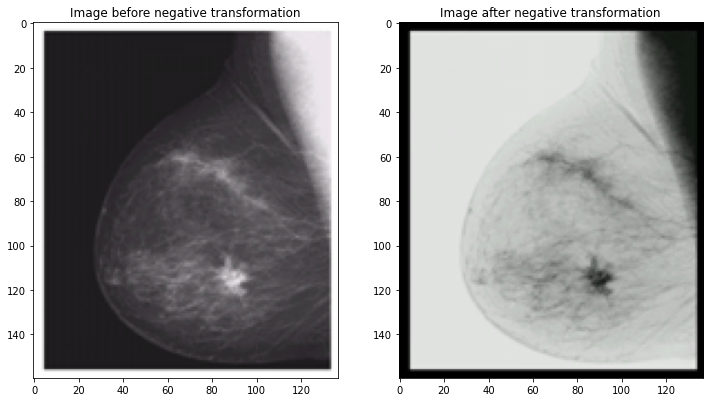

In [10]:
'''
1
Negative Transformation
'''
# Define function ‘Negative’ that apply Negative transformation for any image 
# and any threshold. What is the equation???
def Negative(image,L):
#     image=rgb2gray(image1)
    negative_image = (L-1) - image 
    return negative_image

#Read image ‘Picture1.png’
image = io.imread('imgs\picture1.png')[:,:,:3]
# image = io.imread('imgs\picture1.png')

# Call the function and apply it on the image ‘Picture1.png’
negative_image=Negative(image,256)

# Display the image before and after transformation in the same figure.
show_images([image,negative_image],['Image before negative transformation','Image after negative transformation']) 



[200.06610824 200.35182431 200.78431373 201.0700298  201.35574588
 201.78823529 202.07395137 202.79215686 203.07787294 203.36358902
 204.08179451 214.40672627 215.41064784 216.12885333 216.41456941
 216.84705882 217.1327749  218.42241255 219.14061804 219.85882353
 220.43025569 220.8627451  221.14846118 221.43417725 221.86666667
 222.15238275 222.43809882 222.87058824 223.15630431 223.44202039
 223.8745098  224.16022588 224.87843137 233.62800941 238.93333333
 254.99607843 255.71428392 256.        ]
[  2   7   3   2   2   2   4   1   3   1   3   1  33   6   2   2   2   3
   2   2   1   2   9   2   1   9   3   8  18   6   3   8   6   1   1 424
  20 746]
256.0
<built-in function min> <built-in function max>


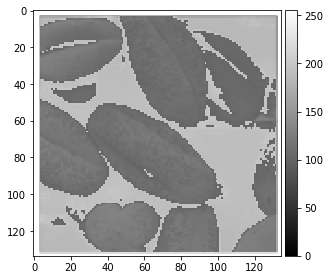

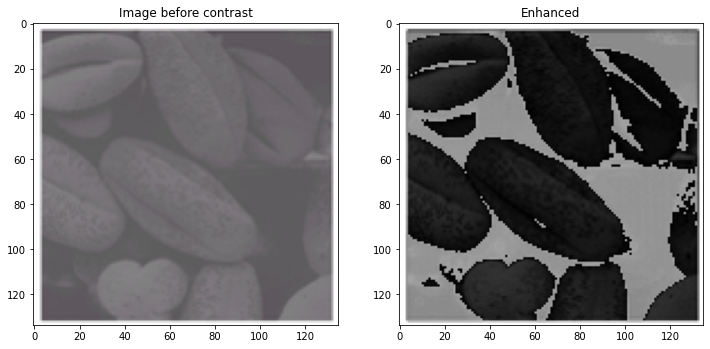

256.0
[200.06610824 200.35182431 200.78431373 201.0700298  201.35574588
 201.78823529 202.07395137 202.79215686 203.07787294 203.36358902
 204.08179451 214.40672627 215.41064784 216.12885333 216.41456941
 216.84705882 217.1327749  218.42241255 219.14061804 219.85882353
 220.43025569 220.8627451  221.14846118 221.43417725 221.86666667
 222.15238275 222.43809882 222.87058824 223.15630431 223.44202039
 223.8745098  224.16022588 224.87843137 233.62800941 238.93333333
 254.99607843 255.71428392 256.        ]
[  2   7   3   2   2   2   4   1   3   1   3   1  33   6   2   2   2   3
   2   2   1   2   9   2   1   9   3   8  18   6   3   8   6   1   1 424
  20 746]
equal
equal


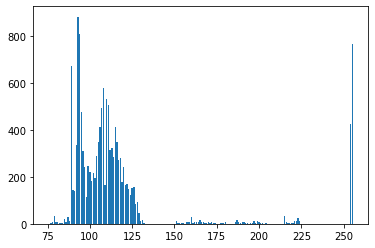

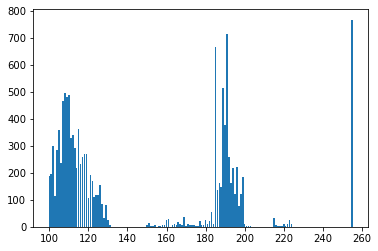

In [36]:
'''
2
Contrast Enhancement
'''

# Define function ‘Contrast_enhancement’ that Stretches the grey levels in the 
# range 0 to 100 into the range 50 – 200 and leaves other levels non changed. 
# What is the equation??? 
# hint: draw the spectrum of levels to know the equation, use for loops and if 
# statements(or matrix conditional indexing which is faster but a little tricky) in 
# the implementation.

# (r1,s1)=>(0,50) 
# (r2,s2)=>(100,200) 
# y=ax+b, slope=(y2-y1)/(x2-x1)=(200-50)/(100-0)=1.5,b=y when x=0 b=50
# y=1.5x+50

# np.where(condition,x,y)
# if condition is true, take x 
# else take y


def Contrast_enhancement(imagePath):
    image = io.imread(imagePath)[:,:,:3]
    streched_image=rgb2gray(image)
    
    streched_image.astype(np.uint8)
    streched_image=streched_image*256
    ar_unique1, i1 = np.unique(streched_image[streched_image>200], return_counts=True)
    print(ar_unique1)
    print(i1)
    s=np.copy(streched_image)
    print(np.max(streched_image))
    # 256 not 255
    print(min,max)
    streched_image = np.where(streched_image<=100,streched_image*1.5+50,streched_image)
    io.imshow(streched_image,cmap="gray",vmin=0,vmax=256)
    io.show()
    show_images([image,streched_image],['Image before contrast',"Enhanced"]) 
    print(np.max(streched_image))
    showHist(s)
    showHist(streched_image)
    ar_unique2, i2 = np.unique(streched_image[streched_image>200], return_counts=True)
    print(ar_unique2)
    print(i2)
    if(np.array_equal(ar_unique1,ar_unique2)):
      print('equal')
    if(np.array_equal(i1,i2)):
      print('equal')

Contrast_enhancement('imgs\picture2.png')


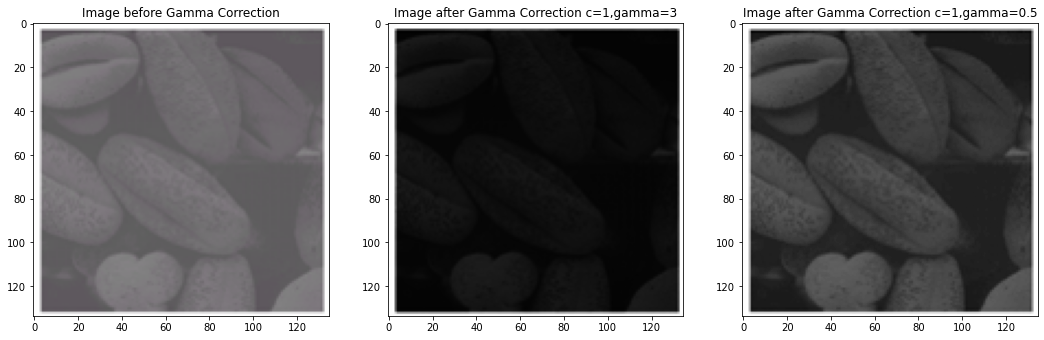

In [12]:
'''
3
Gamma Correction
'''
# Define function ‘Gamma_Correction’ that Stretches the grey levels according 
# to the gamma equation. (𝐴′ = 𝑐 ∗ 𝐴^𝛾) .
def Gamma_Correction(image1, c, gamma):
    image=rgb2gray(image1)
    image=c*(image**gamma)
    return image



#Read image ‘Picture2.png’
image = io.imread('imgs\picture2.png')[:,:,:3]

# Call the function with 𝑐=1 and 𝛾 = 3 and 𝑐=1 and 𝛾 = 0.5
image1=Gamma_Correction(image,1,3)
image2=Gamma_Correction(image,1,0.5)
# Display the images before and after transformation in the same figure.
show_images([image,image1,image2],['Image before Gamma Correction','Image after Gamma Correction c=1,gamma=3','Image after Gamma Correction c=1,gamma=0.5'])
# What is the effect of decreasing 𝛾 ?
# A [0:1] 
# when gamma<1 decreasing of gamma will increase A' -> brighter
# when gamma>1 increasing of gamma will decrease A' -> darker

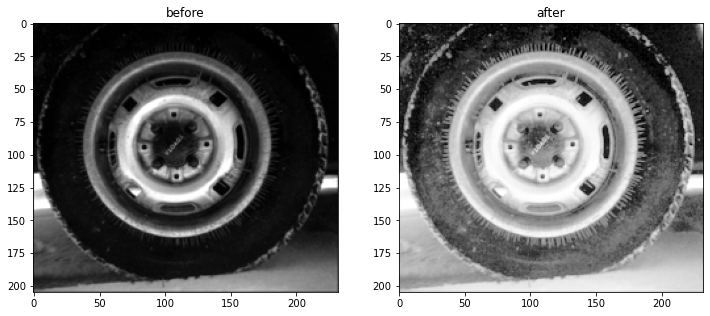

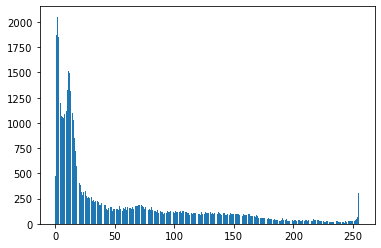

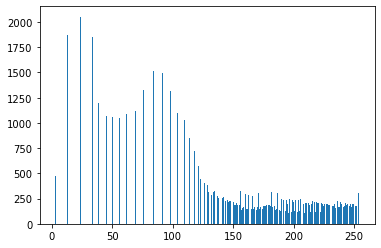

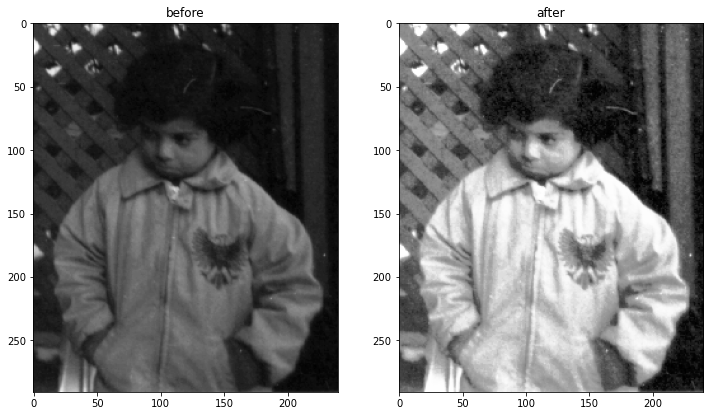

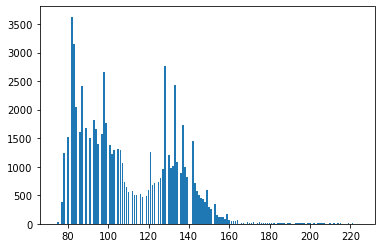

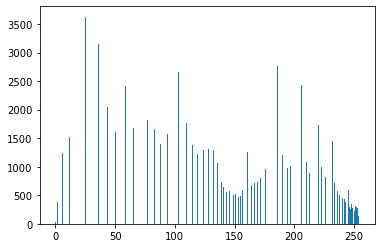

In [13]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
from skimage.exposure import histogram 
from matplotlib.pyplot import bar

def getImageWithHist(name,ext,nbins=256):
    pass

def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)
    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align='center')

def Histogram_Equalization(image,G=256):
    
    image_copy = np.copy(image)
    N,M=image.shape
    image_copy = image_copy.flatten()

    H = np.zeros(G)
    H,nbins = histogram(image_copy,nbins=G)
    H_new=np.zeros(G)
    a=nbins[0]
    b=nbins[len(H)-1]+1
    H_new[a:b] = H

    H_c = np.cumsum(H_new)
    
    image_copy = image_copy.astype(np.uint8)
    image_copy = np.round((G-1) * H_c[image_copy] / (N*M))
    
    image_copy = image_copy.reshape(N,M)
    
#     print(image_copy)
    return image_copy

def perform_Histogram_Equalization(image_path):
    image = io.imread(image_path)
    image_eq=Histogram_Equalization(image)
    show_images([image,image_eq], ['before','after'])
    showHist(image)
    showHist(image_eq)

perform_Histogram_Equalization('imgs/tire.tif')
perform_Histogram_Equalization('imgs/pout.tif')


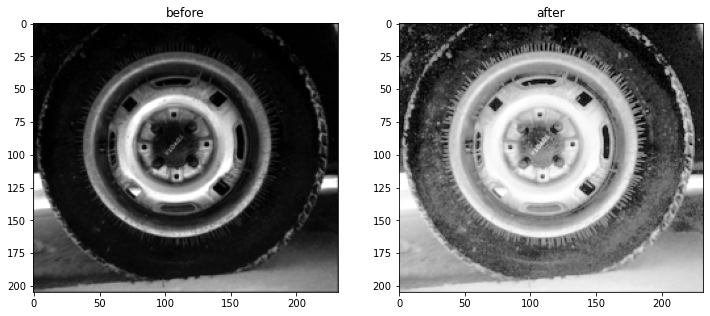

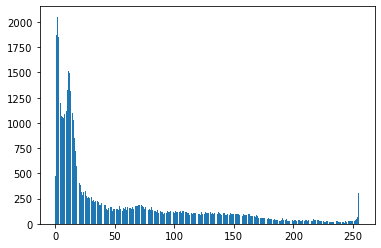

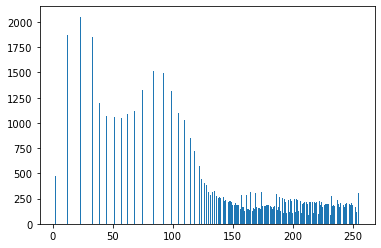

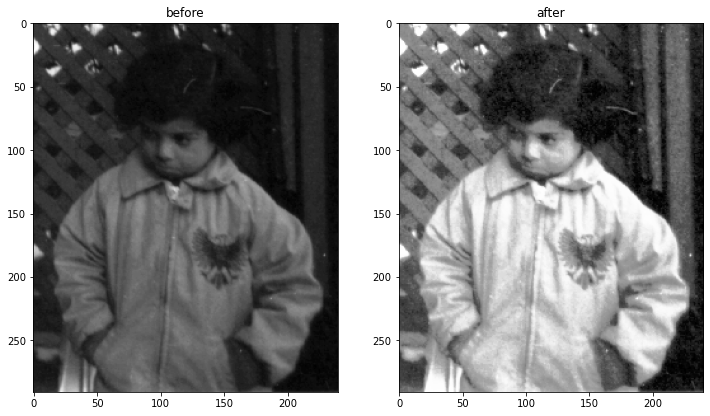

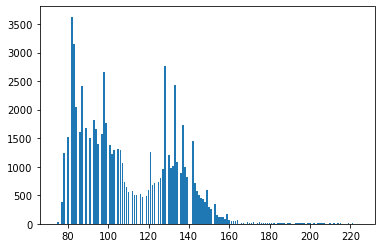

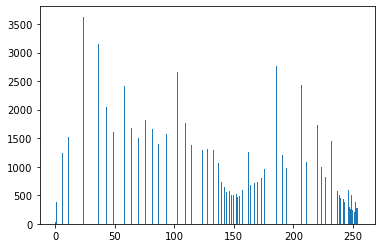

In [14]:
from skimage.exposure import equalize_hist

def test_Histogram_Equalization(image_path):
    image = io.imread(image_path)
    image=image.astype(np.uint8)
    image_eq=equalize_hist(image)
    image_eq=(image_eq*255).astype(np.uint8)
    show_images([image,image_eq], ['before','after'])
    showHist(image)
    showHist(image_eq)
    
test_Histogram_Equalization('imgs/tire.tif')
test_Histogram_Equalization('imgs/pout.tif')


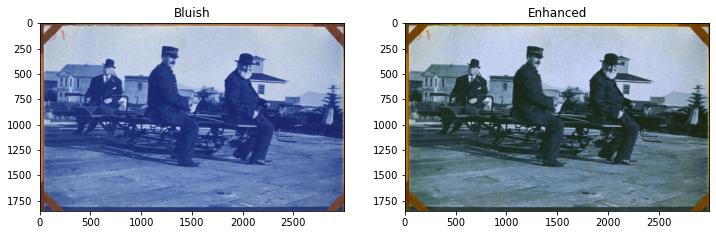

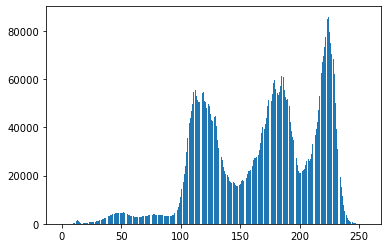

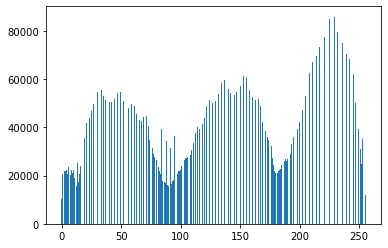

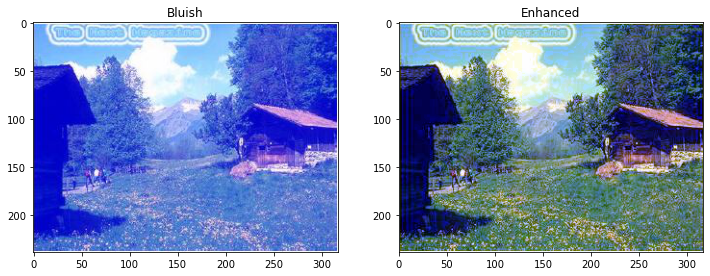

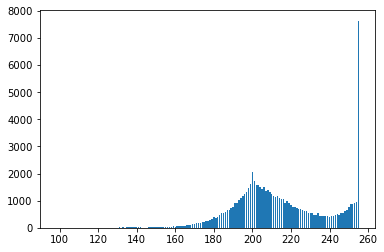

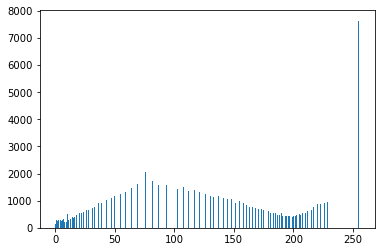

In [40]:
'''
bluish
'''
def eliminate_bluish(img):
    enhanced=np.copy(img)
    enhanced[:, :, 2] = Histogram_Equalization(enhanced[:, :, 2])
    # enhanced[:, :, 1] = Histogram_Equalization(enhanced[:, :, 1])
    # enhanced[:, :, 0] = Histogram_Equalization(enhanced[:, :, 0])
    return enhanced

def test_eliminate_bluish(img_path):
  Bluish=io.imread(img_path)
  Enhanced=eliminate_bluish(Bluish)
  show_images([Bluish, Enhanced], ['Bluish', 'Enhanced'])
  showHist(Bluish[:,:,2])
  showHist(Enhanced[:,:,2])


test_eliminate_bluish('1.jpg')
test_eliminate_bluish('2.jpg')